In [2]:
# Imports
import csv
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
from wordcloud import WordCloud


# Ugly hackery, but necessary: stackoverflow.com/questions/4383571/importing-files-from-different-folder
import sys
sys.path.append('../../')

from src.streaming import spark_functions

# connect to the MongoDB
db = MongoClient()['thesis-dev']

In [3]:
# Load tweets from db, while filtering out non-english tweets
document = " ".join([tweet['text'] for tweet in db.tweets.find()])
counts = dict()
for token in document.split(" "):
    token = ''.join(e for e in token if e.isalnum())
    if token not in counts:
        counts[token] = 0
    else:
        counts[token] += 1

del counts[""]

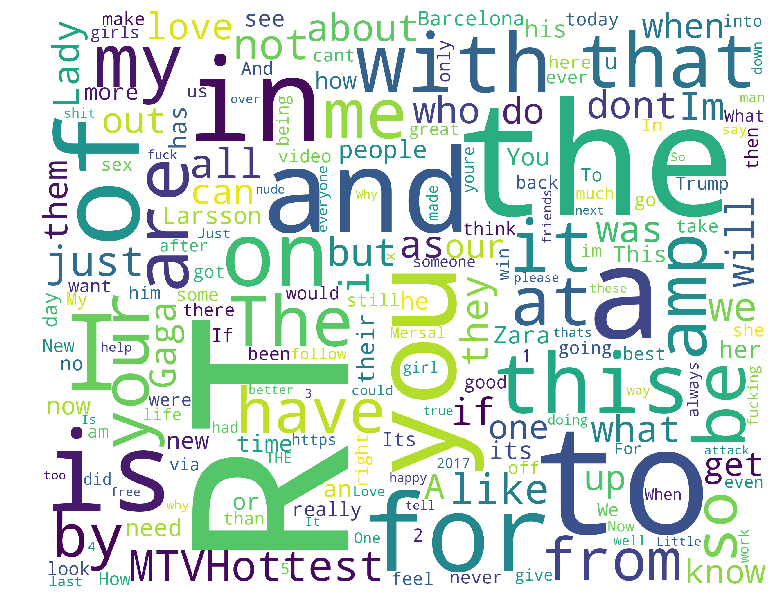

In [4]:
wordcloud = WordCloud(
    stopwords=set(),
    background_color="white",
    width=2500,
    height=2000).generate_from_frequencies(counts)
plt.figure(1, figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("wordcloud_pre.png")
plt.show()

In [11]:
#Wordcloud after preprocessing
preprocess = spark_functions.preprocessor()
tokenize = spark_functions.tokenizer(remove_topwords=True)

counts = dict()
for token in tokenize(preprocess(document)):
    token = ''.join(e for e in token if e.isalnum())
    if token not in counts:
        counts[token] = 0
    else:
        counts[token] += 1

TypeError: tokenizer() got an unexpected keyword argument 'remove_topwords'

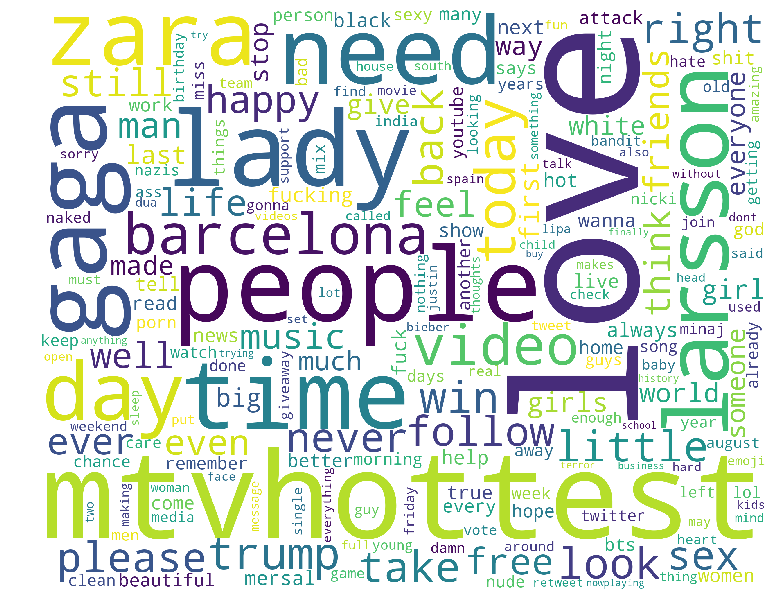

In [12]:
wordcloud = WordCloud(
    stopwords=set(),
    background_color="white",
    width=2500,
    height=2000).generate_from_frequencies(counts)
plt.figure(1, figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("wordcloud_post.png")
plt.show()

In [9]:


for tweet in db.tweets.aggregate([{"$limit":10}]):
    tokenize(preprocess(tweet))
    print(tweet['_id'].generation_time)

2017-08-18 09:10:55+00:00
2017-08-18 09:10:56+00:00
2017-08-18 09:10:56+00:00
2017-08-18 09:10:56+00:00
2017-08-18 09:10:56+00:00
2017-08-18 09:10:56+00:00
2017-08-18 09:10:56+00:00
2017-08-18 09:10:56+00:00
2017-08-18 09:10:56+00:00
2017-08-18 09:10:56+00:00


In [10]:
lda_filename = './../../models/lda/gensim/tweets_stream.lda'
dict_filename = './../../data/processed/tweets_stream.dict'

dictionary = corpora.Dictionary.load(dict_filename)
lda = models.LdaModel.load(lda_filename)

<function src.streaming.spark_functions.preprocessor.<locals>._preprocess>